<a href="https://colab.research.google.com/github/abilonmardhika/F55122017_Quiz_PCD/blob/main/Quiz_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library yang akan digunakan

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
import random
from google.colab.patches import cv2_imshow

1. Baca gambar menggunakan OpenCV dan PIL

In [ ]:
image_path = "/content/quizpcd.jpeg"
img_cv2 = cv2.imread(image_path)
img_pil = Image.open(image_path)

Membaca gambar menggunakan OpenCV

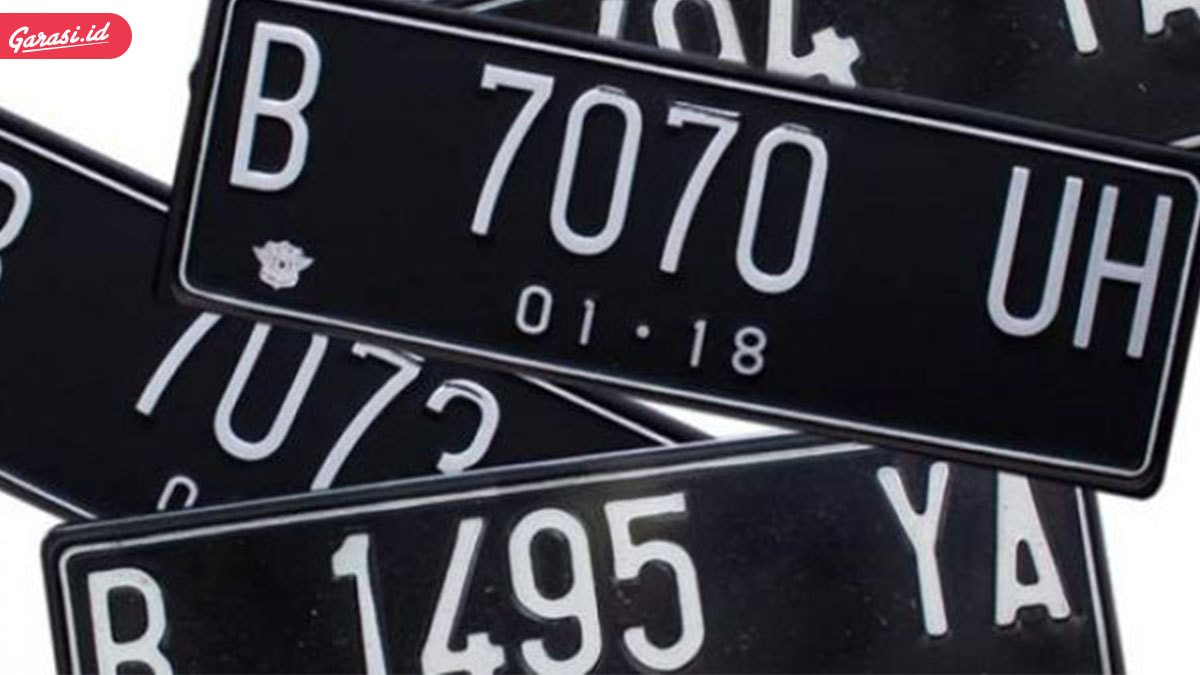

In [ ]:
cv2_imshow(img_cv2)

Membaca gambar menggunakan PIL

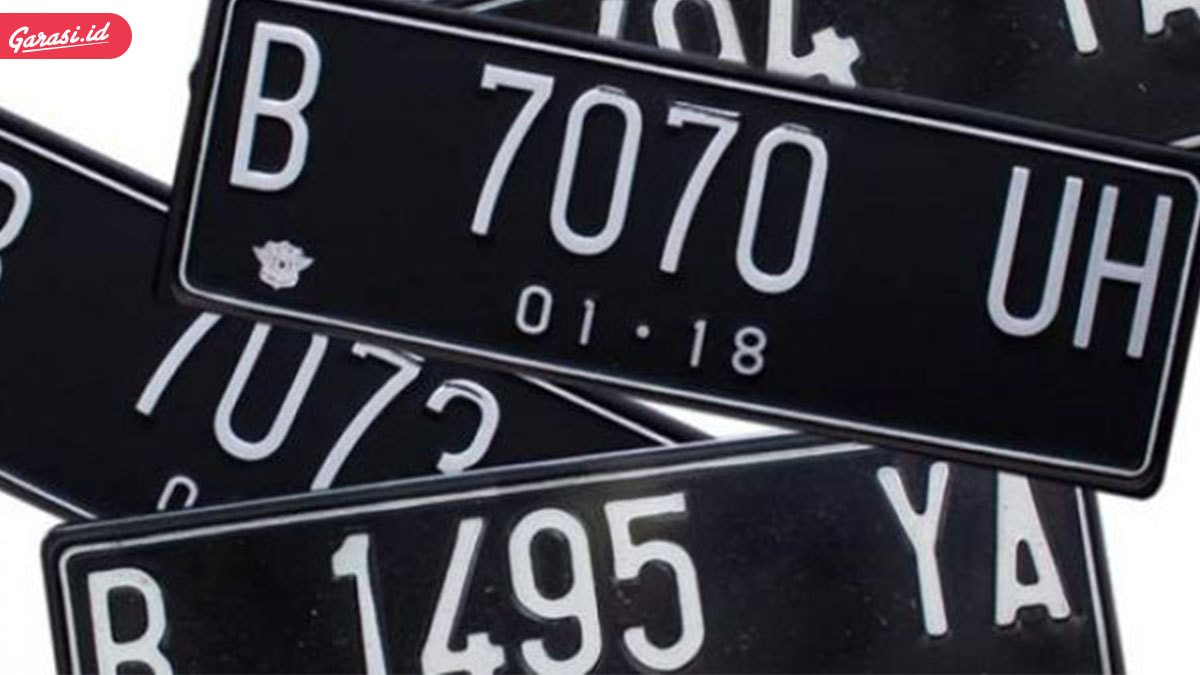

In [ ]:
display(img_pil)

2. Lakukan edge detection menggunakan sobel dan canny

In [ ]:
gray_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

canny_edges = cv2.Canny(gray_img, 100, 200)

Edge detection menggunakan sobel

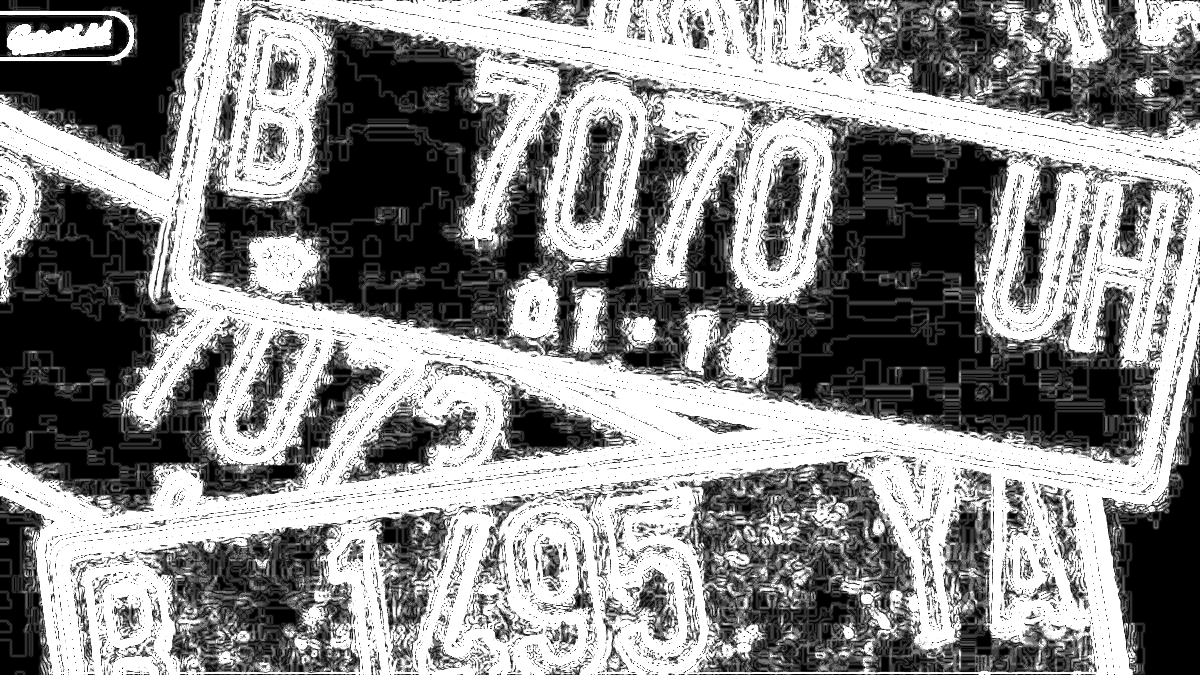

In [ ]:
cv2_imshow(sobel_combined)

Edge detection menggunakan canny

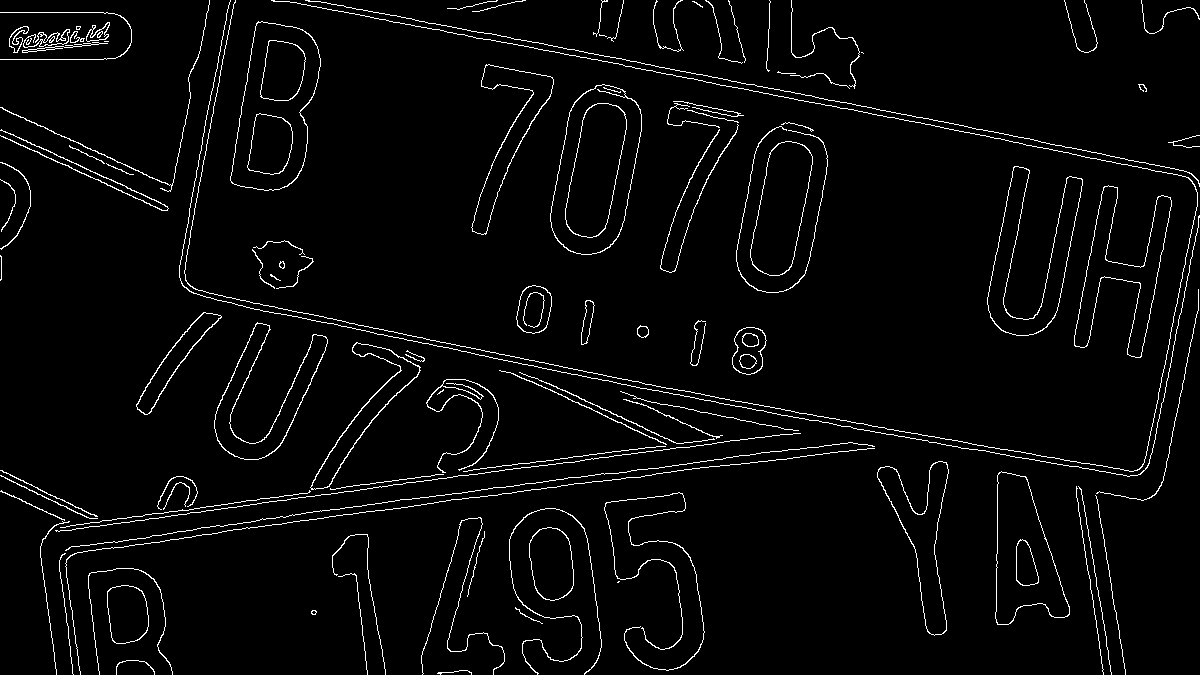

In [ ]:
cv2_imshow(canny_edges)

3. Lakukan cropping: random cropping dan half-size center cropping

In [ ]:
def random_crop(image, crop_size):
    h, w = image.shape[:2]
    top = random.randint(0, h - crop_size)
    left = random.randint(0, w - crop_size)
    bottom = top + crop_size
    right = left + crop_size
    cropped = image[top:bottom, left:right]
    return cropped

def center_crop_half_size(image):
    h, w = image.shape[:2]
    new_h, new_w = h // 2, w // 2
    top = (h - new_h) // 2
    left = (w - new_w) // 2
    bottom = top + new_h
    right = left + new_w
    cropped = image[top:bottom, left:right]
    return cropped

random_cropped_img = random_crop(img_cv2, min(img_cv2.shape[:2]))
half_size_center_cropped_img = center_crop_half_size(img_cv2)

Random cropping

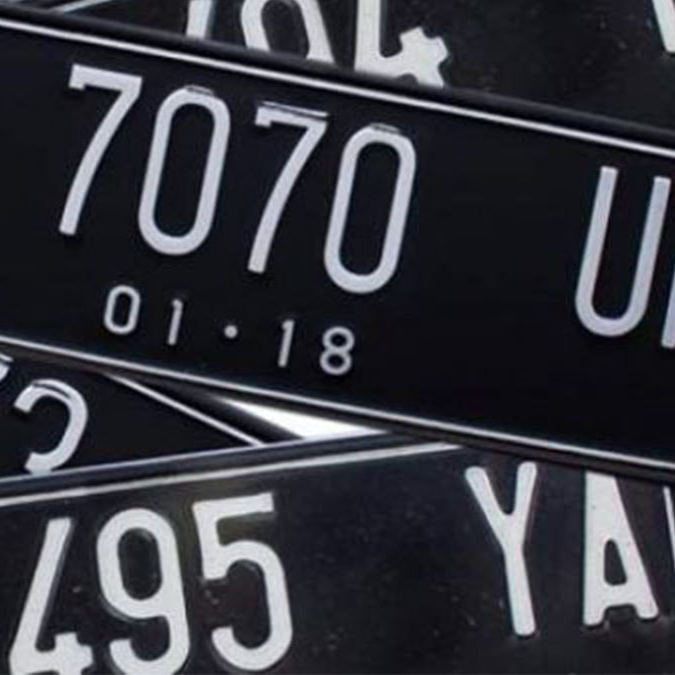

In [ ]:
cv2_imshow(random_cropped_img)

Half-size center cropping

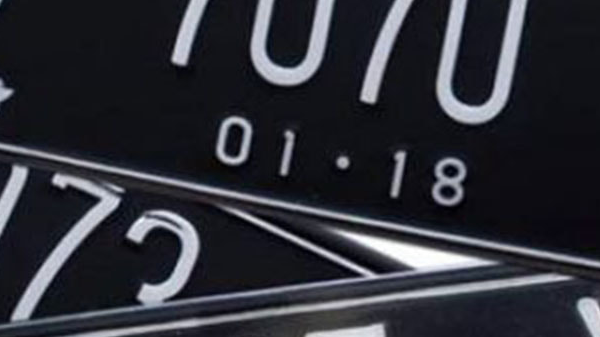

In [ ]:
cv2_imshow(half_size_center_cropped_img)

4. Lakukan transformasi pada gambar : putih jadi hitam, hitam jadi putih

In [ ]:
image_white = cv2.bitwise_not(img_cv2)
image_black = cv2.bitwise_not(image_white)

Tampilan transformasi gambar dari hitam ke putih

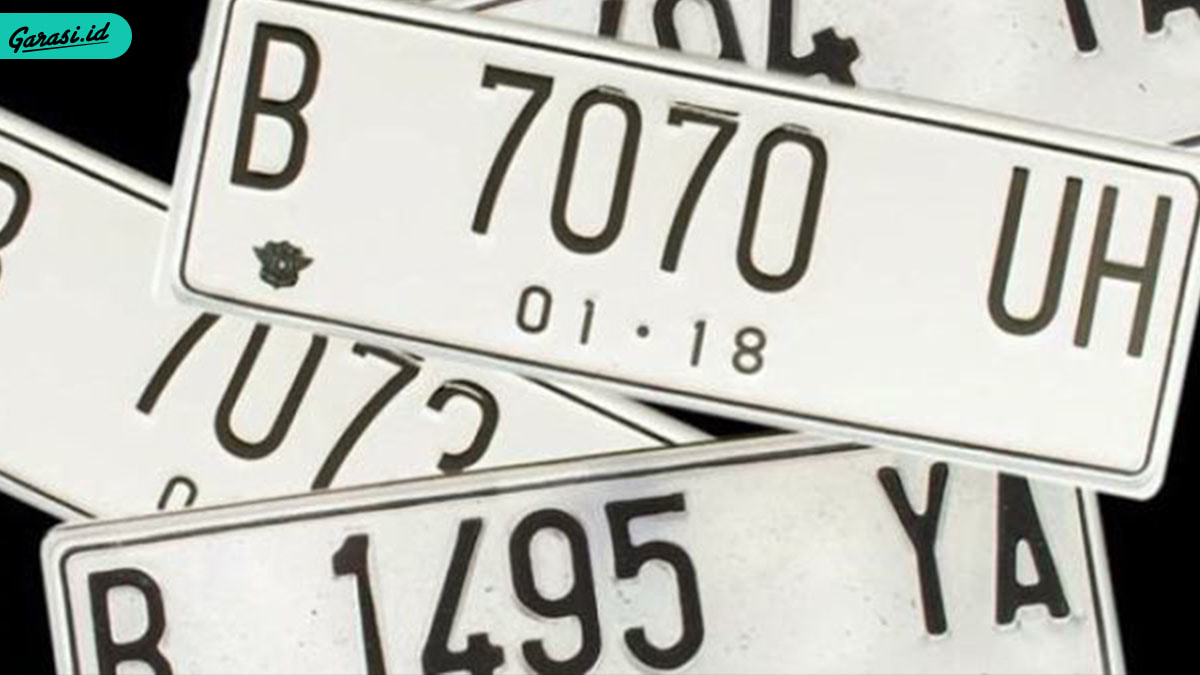

In [ ]:
cv2_imshow(image_white)

Tampilan transformasi gambar dari putih ke hitam

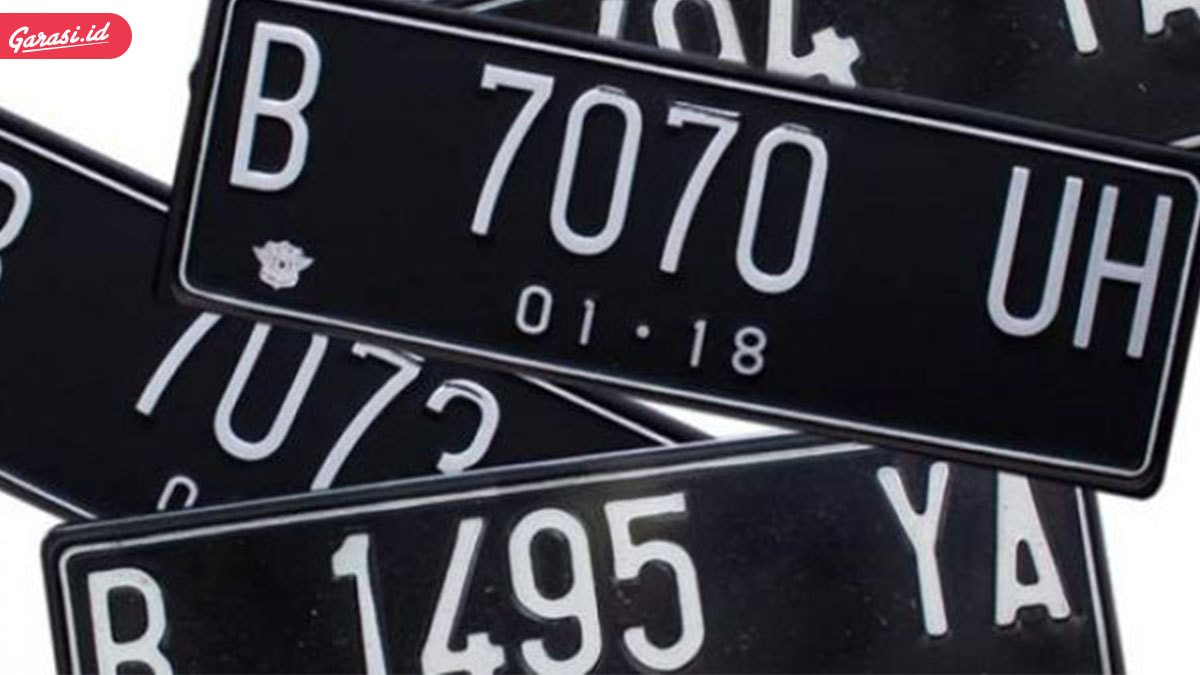

In [ ]:
cv2_imshow(image_black)

5. Tambahkan noise pada gambar original: salt and paper noise dan gaussian

In [ ]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt = np.random.random(image.shape[:2]) <= salt_prob
    pepper = np.random.random(image.shape[:2]) <= pepper_prob
    noisy_image[salt] = [255, 255, 255]
    noisy_image[pepper] = [0, 0, 0]
    return noisy_image

def add_gaussian_noise(image, mean=0, std=25):
    h, w, c = image.shape
    gaussian_noise = np.random.normal(mean, std, (h, w, c))
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

salt_and_pepper_noisy_img = add_salt_and_pepper_noise(img_cv2, salt_prob=0.01, pepper_prob=0.01)
gaussian_noisy_img = add_gaussian_noise(img_cv2)

Tambahan noise pada gambar : salt and paper

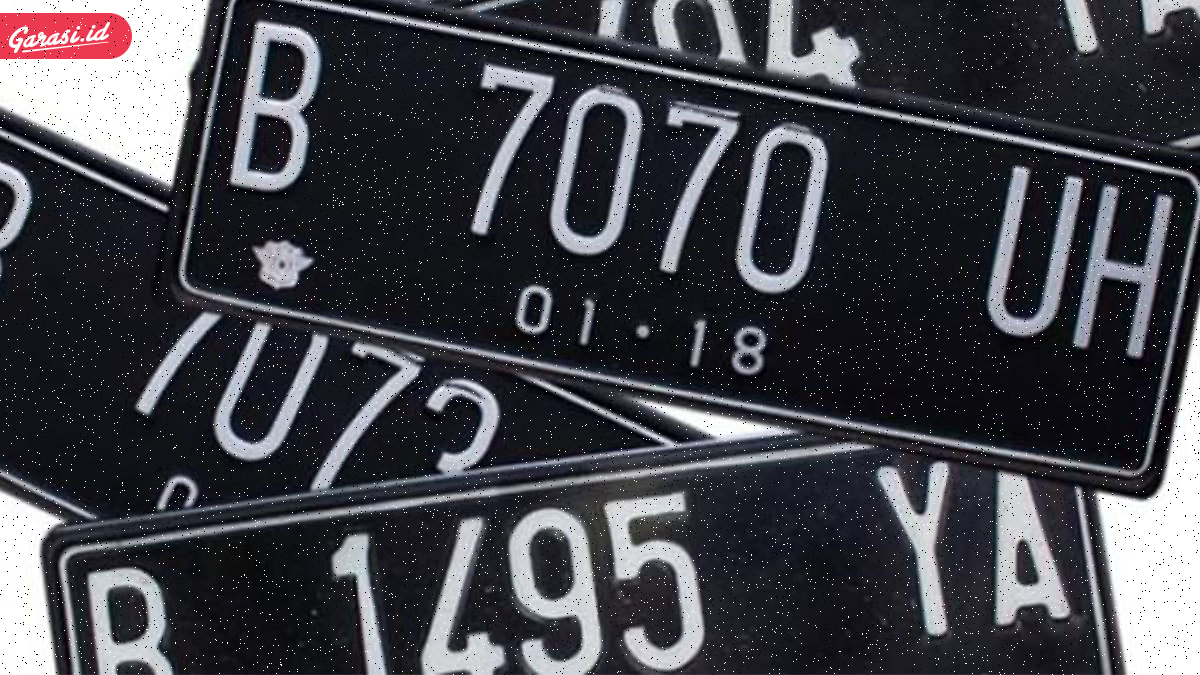

In [ ]:
cv2_imshow(salt_and_pepper_noisy_img)

Tambahan noise pada gambar : gaussian

In [ ]:
cv2_imshow(gaussian_noisy_img)

6. Lakukan transformasi geometri: rotasi, flip, vertikal dan horizontal

In [ ]:
def rotate_image(image, angle):
    h, w = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

def vertical_flip(image):
    return cv2.flip(image, 0)

def horizontal_flip(image):
    return cv2.flip(image, 1)

rotated_img = rotate_image(img_cv2, angle=45)
vertical_flipped_img = vertical_flip(img_cv2)
horizontal_flipped_img = horizontal_flip(img_cv2)

Gambar yang telah dirotasi

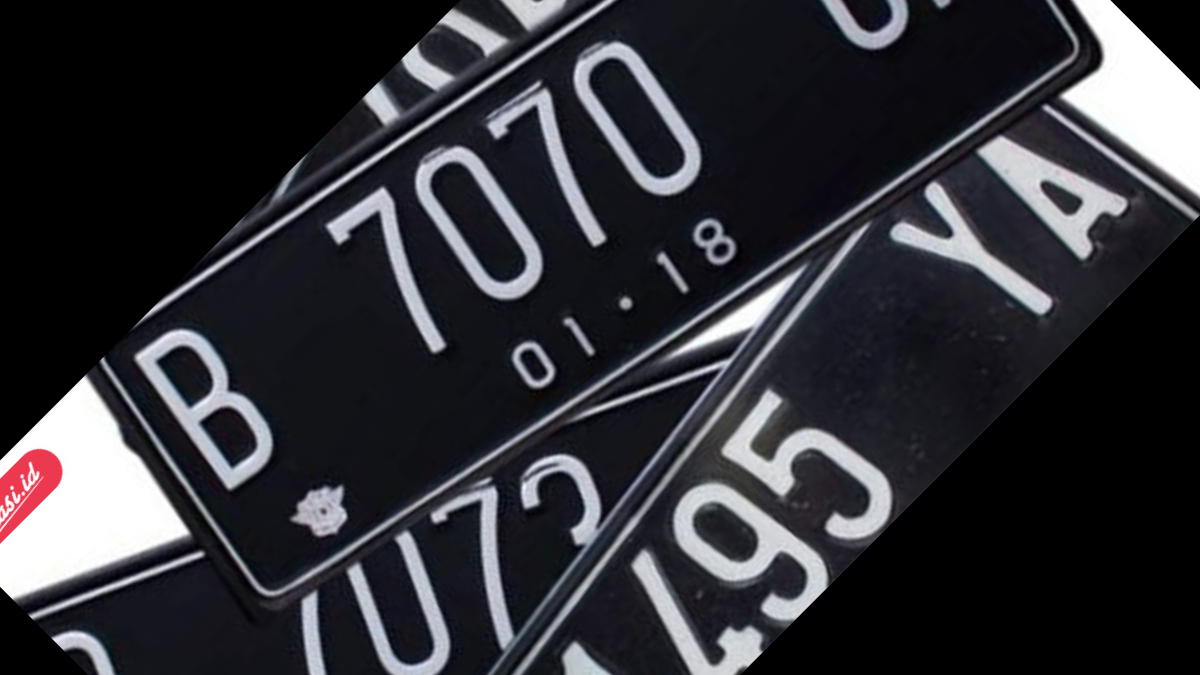

In [ ]:
cv2_imshow(rotated_img)

Gambar yang telah di flip secara vertikal

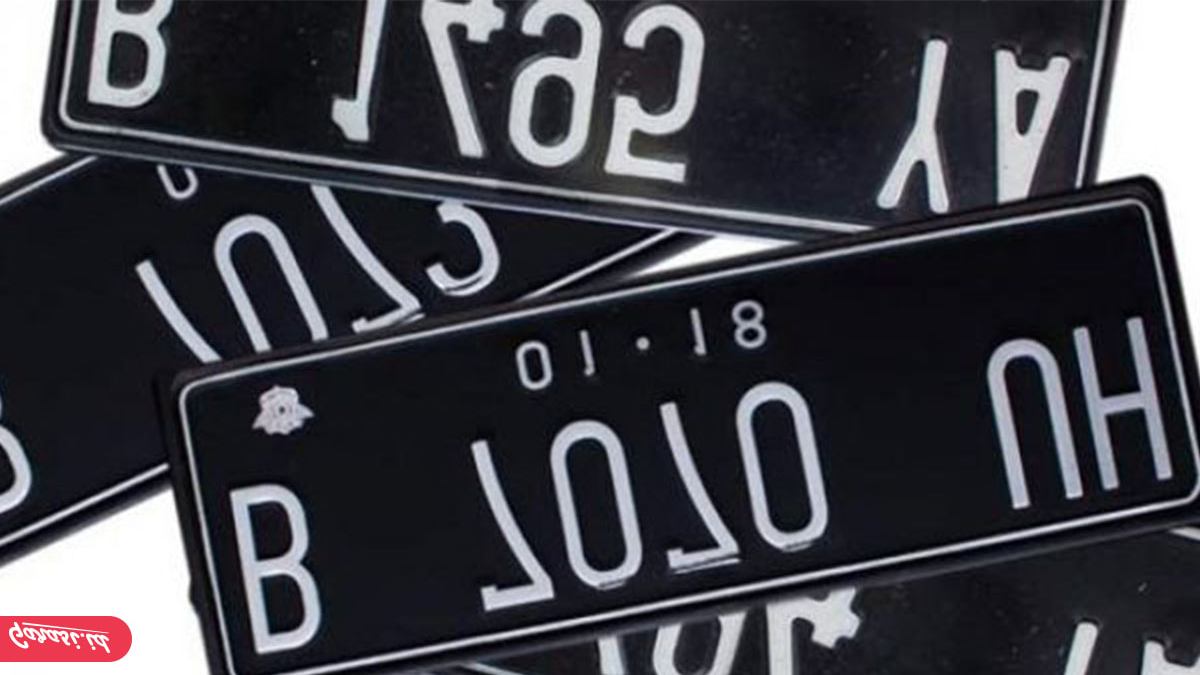

In [ ]:
cv2_imshow(vertical_flipped_img)

Gambar yang telah di flip secara horizontal

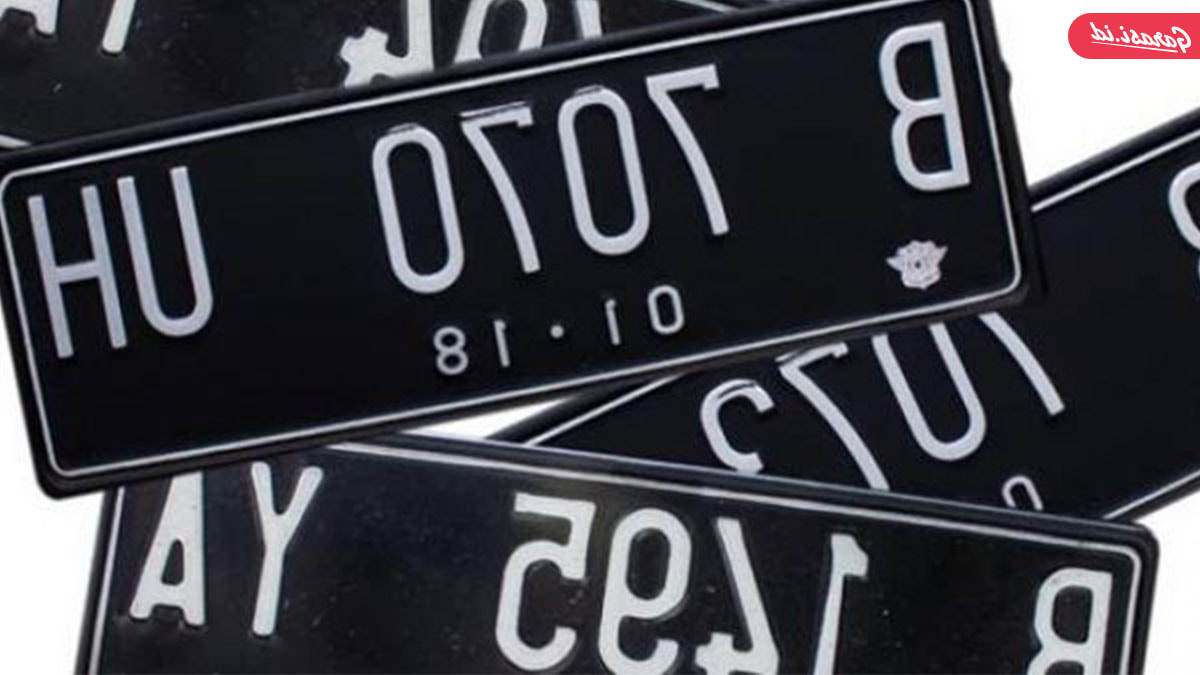

In [ ]:
cv2_imshow(horizontal_flipped_img)